<a href="https://colab.research.google.com/github/evro23x/abstract_dog/blob/cv/hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
'''
It cleans img from noise
'''
def clear_img(file_name):
  img = cv2.imread(file_name, 0)

  dilated_img = cv2.dilate(img, np.ones((7,7), np.uint8))
  bg_img = cv2.medianBlur(dilated_img, 21)
  diff_img = 255 - cv2.absdiff(img, bg_img)
  norm_img = diff_img.copy()
  cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
  _, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
  cv2.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
  thr_img[thr_img < 240] = 0
  cv2.imwrite("c_" + file_name, thr_img)

'''
It resizes image
'''
def resize_img(img, scale):
  return cv2.resize(img,(img.shape[1] * scale, img.shape[0] * scale))

'''
Finding edges 
'''
def define_edged(img, min, max):
  return cv2.Canny(img, min, max)

'''
Finding contours
'''
def get_contours(edged):
  return cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

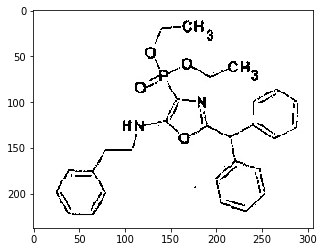

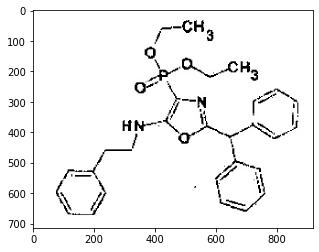

(<matplotlib.image.AxesImage at 0x7f82c5131f98>, None)

In [0]:
clear_img("0.jpg")

img = cv2.imread('c_0.jpg')

plt.imshow(img), plt.show()
plt.imshow(resize_img(img, 3)), plt.show()

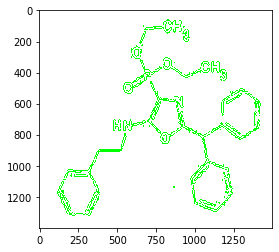

In [0]:
img = cv2.imread('big.jpg')

edged = define_edged(img, 30, 200)
contours, hierarchy = get_contours(edged)

image[::] = 255
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

plt.imshow(image)
plt.show()